**0.0-test-basics notebook**<br>
Version 2020-09-23  A. Lundervold<br>

# Python, Numpy, Pandas, Matplotlib, Cellpose, PyCaret and more

If you successfully run through this notebook your Python environment is likely configured correctly. 

# How to use the Jupyter Notebook?

[Jupyter Notebook](http://jupyter.org/) is a useful tool for experimenting with code. Everything of code and text is written in HTML, Markdown og Python.

Use arrow keys to navigate between cells. Hit ENTER on a cell to swith to editing mode. ESC to get back. (Try now!)

In [1]:
print("This is a Jupyter cell containing Python code. Hit 'Run' in the menu to run the cell. ")

This is a Jupyter cell containing Python code. Hit 'Run' in the menu to run the cell. 


You can also run cells by typing **Shift+Enter** or **Ctrl+Enter**. Try running the cell above by using both of thes

You will find more information via the Help menu above.

BMED360 will use Jupyter for most of the coding, and you will acquire good Notebook skills through practise. Here is a good tutorial on Jupyter Notebook that is recommended:: [Jupyter Notebook Tutorial: The Definitive Guide](https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook).

# Import libraries

These are libraries that will be frequently used in the course:

In [2]:
# To display plots directly in the notebook:
%matplotlib inline

In [3]:
# A frequently used plotting library:
import matplotlib
import matplotlib.pyplot as plt

In [4]:
# An extension of matplotlib generating nice(er) plots with small amount of code:
import seaborn as sns

In [5]:
# Library for numerical linear algebra (matrices and more) - the workhorse of numerical computing in Python:
import numpy as np

In [6]:
# To read, write and process tabular data - the workhorse of data analysis in Python:
import pandas as pd

In [7]:
# For machine learning:
import sklearn

In [8]:
# Machine learning using autoML:
import pycaret

In [9]:
# For cellular segmentation:
import cellpose

In [10]:
# For handling IMC raw data
import imctools

In [11]:
# For reading and writing images:
import imageio

In [12]:
# For advanced image processing:
import skimage

# Test libraries

**NB:** The aim here is to test your installation: (most of) the tools in place? <br>
Do not despair (or disappear) if you do not understand what is going on (at this stage).
It can be seen as a motivation and you will get to know during the course. 

## `Numpy`

In [13]:
import numpy as np

In [14]:
a = np.array([1, 2, 3])
print(type(a))

<class 'numpy.ndarray'>


In [15]:
e = np.random.random((3,3))
e

array([[0.04800008, 0.23004293, 0.65967875],
       [0.45211572, 0.97548294, 0.61915575],
       [0.72163795, 0.55720511, 0.44180398]])

## `matplotlib`: a simple plot

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

A figure displaying a [sine function](https://en.wikipedia.org/wiki/Sine):

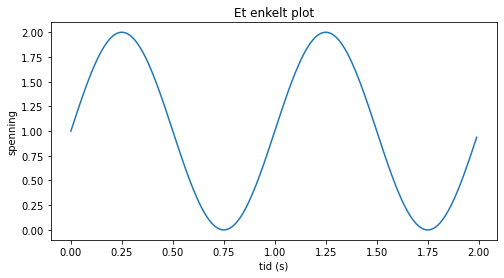

In [17]:
# Data to be plotted (generated by Numpy)
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

# Make a figure of specified size
f, ax = plt.subplots(figsize=(8,4))

# Plot t versus s
plt.plot(t, s)

# Add title and labels:
plt.title('Et enkelt plot')
plt.xlabel('tid (s)')
plt.ylabel('spenning')

# Show plot:
plt.show()

## `Seaborn`: a more advanced plot

In [18]:
import seaborn as sns

Source: [Link](https://seaborn.pydata.org/examples/scatterplot_categorical.html)

/home/arvid/anaconda3/envs/imc/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/arvid/anaconda3/envs/imc/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


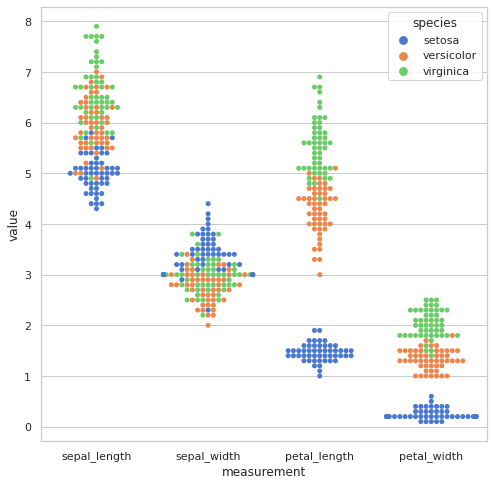

In [19]:
sns.set(style="whitegrid", palette="muted")

# Load the (famous) iris data set
iris = sns.load_dataset("iris")

# "Melt" data set to "long-form" or "tidy" representation
iris = pd.melt(iris, "species", var_name="measurement")

# Make a figure of specified size
f, ax = plt.subplots(figsize=(8,8))

# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="measurement", y="value", hue="species", data=iris, size=5, ax=ax)

plt.show()

## `Pandas`

In [20]:
import pandas as pd

In [21]:
df = pd.read_csv('./test-data/0.0-test_data.csv')

In [22]:
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


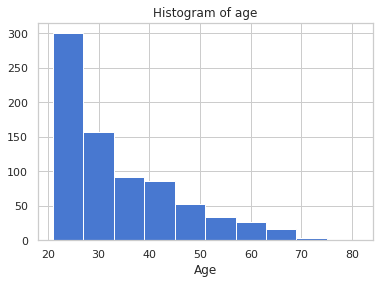

In [23]:
df['age'].hist()
plt.title("Histogram of age")
plt.xlabel("Age")
plt.show()

## `scikit-learn`: machine learning

In [24]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [25]:
data = datasets.load_breast_cancer()

In [26]:
X = data['data']
y = data['target']
features = data['feature_names']
labels = data['target_names']

In [27]:
print(features)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [28]:
print(labels)

['malignant' 'benign']


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [30]:
rf = RandomForestClassifier(n_estimators=100)

In [31]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
predictions = rf.predict(X_test)

In [33]:
accuracy_score(y_test, predictions) * 100

95.1048951048951

## `PyCaret`: Machine learning (autoML) in Python

In [34]:
# check pycaret version
from pycaret.utils import version
version()

'2.2.2'

## `Cellpose`: Cell segmentation in Python

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io
from cellpose import models

# model_type='cyto' or model_type='nuclei'
model = models.Cellpose(model_type='cyto')

# list of files
# PUT PATH TO YOUR FILES HERE!
#files = ['/media/carsen/DATA1/TIFFS/onechan.tif']
files = ['./test-data/img02.png']

# http://www.cellpose.org/image/img02.png/0/2/3

imgs = [skimage.io.imread(f) for f in files]
nimg = len(imgs)

# define CHANNELS to run segementation on
# grayscale=0, R=1, G=2, B=3
# channels = [cytoplasm, nucleus]
# if NUCLEUS channel does not exist, set the second channel to 0
channels = [[2,3]]
# IF ALL YOUR IMAGES ARE THE SAME TYPE, you can give a list with 2 elements
# channels = [0,0] # IF YOU HAVE GRAYSCALE
# channels = [2,3] # IF YOU HAVE G=cytoplasm and B=nucleus
# channels = [2,1] # IF YOU HAVE G=cytoplasm and R=nucleus

# if diameter is set to None, the size of the cells is estimated on a per image basis
# you can set the average cell `diameter` in pixels yourself (recommended)
# diameter can be a list or a single number for all images

masks, flows, styles, diams = model.eval(imgs, diameter=None, channels=channels)

>>>> using CPU


Downloading: "http://www.cellpose.org/models/cyto_0" to /home/arvid/.cellpose/models/cyto_0
100%|██████████| 25.2M/25.2M [00:06<00:00, 3.79MB/s]
Downloading: "http://www.cellpose.org/models/cyto_1" to /home/arvid/.cellpose/models/cyto_1
100%|██████████| 25.2M/25.2M [00:06<00:00, 3.81MB/s]
Downloading: "http://www.cellpose.org/models/cyto_2" to /home/arvid/.cellpose/models/cyto_2
100%|██████████| 25.2M/25.2M [00:06<00:00, 3.85MB/s]
Downloading: "http://www.cellpose.org/models/cyto_3" to /home/arvid/.cellpose/models/cyto_3
100%|██████████| 25.2M/25.2M [00:06<00:00, 3.83MB/s]
Downloading: "http://www.cellpose.org/models/size_cyto_0.npy" to /home/arvid/.cellpose/models/size_cyto_0.npy
100%|██████████| 3.55k/3.55k [00:00<00:00, 7.15MB/s]
Downloading: "http://www.cellpose.org/models/nuclei_0" to /home/arvid/.cellpose/models/nuclei_0
100%|██████████| 25.2M/25.2M [00:06<00:00, 3.88MB/s]
Downloading: "http://www.cellpose.org/models/nuclei_1" to /home/arvid/.cellpose/models/nuclei_1
100%|███████

cellpose_residual_on_style_on_concatenation_off
processing 1 image(s)
time spent: running network 0.55s; flow+mask computation 0.00
time spent: running network 0.37s; flow+mask computation 0.59
estimated cell diameters for 1 image(s) in 1.62 sec
time spent: running network 2.69s; flow+mask computation 0.64
estimated masks for 1 image(s) in 3.33 sec
>>>> TOTAL TIME 4.95 sec


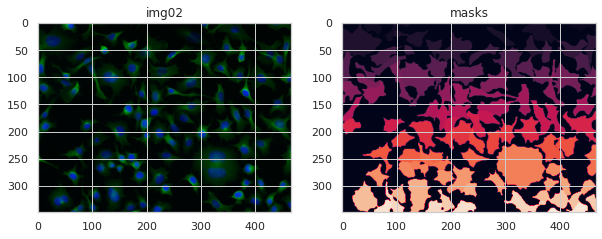

In [36]:
img02 = imageio.imread("./test-data/img02.png")
fig, axes = plt.subplots(1, 2, figsize=(10, 12), sharex=False, sharey=False)
ax = axes.ravel()
ax[0].imshow(img02)
ax[0].set_title("img02")
ax[1].imshow(np.squeeze(masks))
ax[1].set_title("masks")
plt.show()

## `scikit-image`: Image processing in Python

Example from the <a href="http://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_ihc_color_separation.html">scikit-image</a>-documentation: **Immunohistochemical staining colors separation**

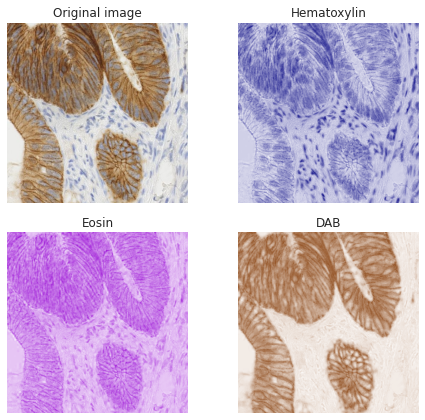

In [37]:
import matplotlib.pyplot as plt

from skimage import data
from skimage.color import rgb2hed
from matplotlib.colors import LinearSegmentedColormap

# Create an artificial color close to the original one
cmap_hema = LinearSegmentedColormap.from_list('mycmap', ['white', 'navy'])
cmap_dab = LinearSegmentedColormap.from_list('mycmap', ['white',
                                             'saddlebrown'])
cmap_eosin = LinearSegmentedColormap.from_list('mycmap', ['darkviolet',
                                               'white'])

ihc_rgb = data.immunohistochemistry()
ihc_hed = rgb2hed(ihc_rgb)

fig, axes = plt.subplots(2, 2, figsize=(7, 6))
ax = axes.ravel()

ax[0].imshow(ihc_rgb)
ax[0].set_title("Original image")

ax[1].imshow(ihc_hed[:, :, 0], cmap=cmap_hema)
ax[1].set_title("Hematoxylin")

ax[2].imshow(ihc_hed[:, :, 1], cmap=cmap_eosin)
ax[2].set_title("Eosin")

ax[3].imshow(ihc_hed[:, :, 2], cmap=cmap_dab)
ax[3].set_title("DAB")

for a in ax.ravel():
    a.axis('off')

fig.tight_layout()

Manipulation of the hematoxylin and DAB-«channels»:

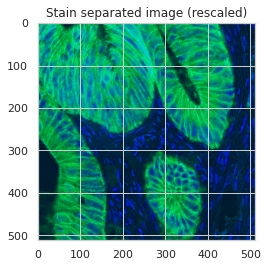

In [38]:
import numpy as np
from skimage.exposure import rescale_intensity

# Rescale hematoxylin and DAB signals and give them a fluorescence look
h = rescale_intensity(ihc_hed[:, :, 0], out_range=(0, 1))
d = rescale_intensity(ihc_hed[:, :, 2], out_range=(0, 1))
zdh = np.dstack((np.zeros_like(h), d, h))

fig, ax = plt.subplots()
ax.imshow(zdh)
ax.set_title("Stain separated image (rescaled)")
#ax.axis('off')
plt.show()

## `imageio` : Python library for reading and writing image data

In [39]:
cellimg2 = imageio.imread("./test-data/img02.png")
cellimg3 = imageio.imread("./test-data/img03.png")
cellimg5 = imageio.imread("./test-data/img05.png")
print('cellimg2:', cellimg2.shape)
print('cellimg3:', cellimg3.shape)
print('cellimg5:', cellimg5.shape)

cellimg2: (349, 467, 3)
cellimg3: (346, 462, 3)
cellimg5: (677, 677, 3)


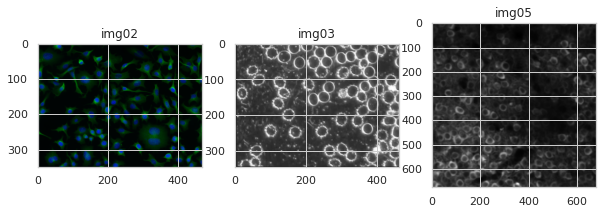

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(10, 16), sharex=False, sharey=False)
ax = axes.ravel()
ax[0].imshow(cellimg2)
ax[0].set_title("img02")
ax[1].imshow(cellimg3)  # , cmap='gray')
ax[1].set_title("img03")
ax[2].imshow(cellimg5)
ax[2].set_title("img05")
plt.show()

In [41]:
# Number of occurences of each unique color (class label in cellimg2) in descending order (top 10)
from collections import Counter
Counter([tuple(colors) for i in cellimg2 for colors in i]).most_common()[:10]

[((0, 4, 4), 19381),
 ((0, 5, 4), 13106),
 ((0, 6, 4), 7282),
 ((0, 4, 3), 6483),
 ((0, 6, 5), 4178),
 ((0, 5, 5), 3532),
 ((0, 5, 3), 3423),
 ((0, 7, 4), 3328),
 ((0, 8, 4), 2226),
 ((0, 7, 5), 2001)]

In [42]:
# Count the number of occurences of pixel graylevels in cellimg3  (top 10)
Counter([tuple(colors) for i in cellimg3 for colors in i]).most_common()[:10]

[((51, 51, 51), 4409),
 ((46, 46, 46), 3763),
 ((50, 50, 50), 3683),
 ((55, 55, 55), 3257),
 ((49, 49, 49), 3232),
 ((54, 54, 54), 3216),
 ((62, 62, 62), 3164),
 ((56, 56, 56), 3080),
 ((57, 57, 57), 3060),
 ((58, 58, 58), 2945)]